# 6. Бустинг. Практика

In [67]:
import numpy as np
import pandas as pd

In [68]:
df = pd.read_csv('data/AirPass.csv', index_col=0)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [69]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

 Задание 6.2
1 point possible (graded)
Теперь давайте избавимся от найденных пропусков. Заполните их все медианными значениями. После этого вычислите среднее арифметическое для признака, отражающего задержку при прибытии в минутах. Ответ округлите до двух знаков после точки-разделителя.

In [70]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [71]:
df['Arrival Delay in Minutes'].mean()

15.133392362180475

 Задание 6.3
3 points possible (graded)

Проведём небольшой разведывательный анализ. Посмотрим, в каких категориях пассажиров превалировали удовлетворённые полетом клиенты.

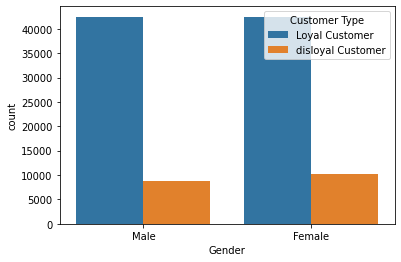

In [72]:
import seaborn as sns
sns.countplot(data=df, x='Gender',hue='Customer Type');

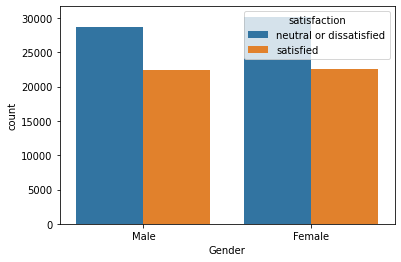

In [73]:
sns.countplot(data=df, x='Gender',hue='satisfaction');

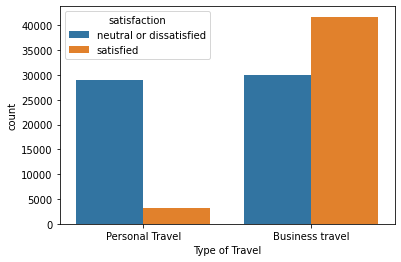

In [74]:
sns.countplot(data=df, x='Type of Travel',hue='satisfaction');

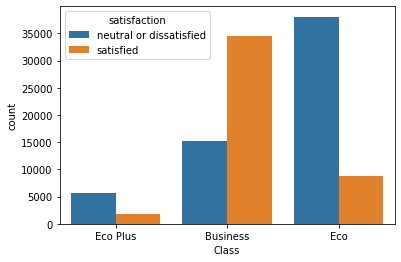

In [75]:
sns.countplot(data=df, x='Class',hue='satisfaction');

In [76]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [77]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,1,13,0,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,0,0,25,1,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,1,1,26,1,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,1,1,25,1,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,0,1,61,1,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,0,23,1,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,0
103900,73097,0,1,49,1,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,68825,0,0,30,1,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,54173,1,0,22,1,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0


 Задание 6.4
1 point possible (graded)
Для остальных категориальных признаков создайте dummy-переменные. Сделайте это с помощью функции get_dummies() из библиотеки Pandas, параметры не меняйте. Сколько теперь признаков в данных (включая целевую переменную)?

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  int64  
 2   Customer Type                      103904 non-null  int64  
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  int64  
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [79]:
df = pd.get_dummies(df, columns=['Class'])
df.shape

(103904, 26)

 Задание 6.5
1 point possible (graded)
Мы практически добрались до обучения модели. Разбейте данные на обучающую и тестовую выборки в соотношении 80/20, параметр random_state = 26. Сколько наблюдений попало в тестовую выборку?

In [80]:
from sklearn.model_selection import train_test_split
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=26, test_size=0.2)

In [81]:
X_test.shape

(20781, 25)

 Задание 6.6
1 point possible (graded)

Теперь нам необходимо реализовать масштабирование данных. Для этого обучите на обучающей выборке метод StandardScaler() и с помощью него преобразуйте и обучающую, и тестовую выборки. Не забудьте, что целевую переменную обрабатывать не нужно.

In [84]:
from sklearn import preprocessing
ss = preprocessing.StandardScaler()

In [94]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

 Задание 6.7
1 point possible (graded)

Перейдём к обучению моделей. В качестве первой модели возьмём самую простую — логистическую регрессию. Мы делаем это для того, чтобы потом сравнивать с ней полученные результаты: так вы сможете выяснить, насколько ансамбли смогут улучшить точность прогноза.

Обучите логистическую регрессию с параметрами по умолчанию на наших данных. В качестве ответа введите значение метрики f1_score. Ответ округлите до трёх знаков после точки-разделителя.

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression()

In [97]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('F1_score', round(metrics.f1_score(y_test, y_pred),3))

F1_score 0.855


 Задание 6.8
1 point possible (graded)

Теперь перейдём к бустингу. Начнём с обучения первой модели — AdaBoost. В качестве базовой модели для неё возьмите решающее дерево с параметром random_state = 26.

Обучите AdaBoost, зафиксировав random_state со значением 26 и задав темп обучения 0.01. В качестве ответа введите значение метрики f1_score. Ответ округлите до трёх знаков после точки-разделителя.

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(
    random_state=26
)

ada = AdaBoostClassifier(
    estimator=dt,
    learning_rate=0.01, #темп обучения
    random_state=26
)
ada.fit(X_train, y_train)

ada_pred  = ada.predict(X_test)
print(f'Качество предсказания F1_score для AdaBoost {round(metrics.f1_score(y_test, ada_pred),2)}')

Качество предсказания F1_score для AdaBoost 0.94


 Задание 6.9
1 point possible (graded)

Перейдем к следующему алгоритму — градиентному бустингу.

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

params = {
    "n_estimators":2**np.arange(8), 
    "learning_rate":0.1**np.arange(3)
    }

In [136]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [137]:
gb = GradientBoostingClassifier()
grid_search = GridSearchCV(
    estimator=gb, 
    param_grid=params, 
    cv=3, 
    n_jobs = -1
)  
%time grid_search.fit(X_train, y_train) 
y_pred = grid_search.predict(X_train)

CPU times: total: 32.9 s
Wall time: 4min 29s


In [138]:
grid_search.best_params_

{'learning_rate': 1.0, 'n_estimators': 128}

In [139]:
grid_search.best_score_

0.9563658696077831

In [140]:
print(f'Качество предсказания F1_score {round(metrics.f1_score(y_train, y_pred),3)}')

Качество предсказания F1_score 0.961


In [144]:
model_for_gs = GradientBoostingClassifier()
params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}
gs = GridSearchCV(model_for_gs, 
                  params, 
                  cv=3, 
                  scoring=metrics.make_scorer(metrics.f1_score),
                  verbose=5)
 
gs.fit(X_train, y_train)
 
print("Лучшие гиперпараметры:", gs.best_params_)
print("Лучшее значение метрики:", gs.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END .learning_rate=1.0, n_estimators=1;, score=0.873 total time=   0.1s
[CV 2/3] END .learning_rate=1.0, n_estimators=1;, score=0.870 total time=   0.1s
[CV 3/3] END .learning_rate=1.0, n_estimators=1;, score=0.871 total time=   0.2s
[CV 1/3] END .learning_rate=1.0, n_estimators=2;, score=0.880 total time=   0.3s
[CV 2/3] END .learning_rate=1.0, n_estimators=2;, score=0.878 total time=   0.3s
[CV 3/3] END .learning_rate=1.0, n_estimators=2;, score=0.875 total time=   0.3s
[CV 1/3] END .learning_rate=1.0, n_estimators=4;, score=0.901 total time=   0.7s
[CV 2/3] END .learning_rate=1.0, n_estimators=4;, score=0.896 total time=   0.7s
[CV 3/3] END .learning_rate=1.0, n_estimators=4;, score=0.897 total time=   0.7s
[CV 1/3] END .learning_rate=1.0, n_estimators=8;, score=0.920 total time=   1.5s
[CV 2/3] END .learning_rate=1.0, n_estimators=8;, score=0.920 total time=   1.4s
[CV 3/3] END .learning_rate=1.0, n_estimators=8;

 Задание 6.10
1 point possible (graded)

Обучите алгоритм XGBoost. Так как он достаточно мощный «из коробки», определите его с параметрами по умолчанию, только задайте random_state = 26. Какое значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

In [145]:
from xgboost import XGBClassifier

In [146]:
xgb = XGBClassifier(random_state=26)
xgb.fit(X_train,y_train)
y_pred_test = xgb.predict(X_test)
print(f'Качество предсказания F1_score {round(metrics.f1_score(y_pred_test, y_test),3)}')

Качество предсказания F1_score 0.958


 Задание 6.11
1 point possible (graded)

Обучите алгоритм CatBoost. Как и XGBoost, будем обучать его с настройками по умолчанию и заданным random_state = 26. Какое значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

In [150]:
import catboost import CatBoostClassifier

ImportError: cannot import name 'get_confusion_matrix' from 'catboost' (d:\Python\Python310\lib\site-packages\catboost\__init__.py)

In [148]:
cbc = CatBoostClassifier(random_state=26)
cbc.fit(X_train,y_train)
y_pred_test = cbc.predict(X_test)
print(f'Качество предсказания F1_score {round(metrics.f1_score(y_pred_test, y_test),3)}')

Learning rate set to 0.068023
0:	learn: 0.6018089	total: 88ms	remaining: 1m 27s
1:	learn: 0.5020769	total: 110ms	remaining: 55.1s
2:	learn: 0.4472481	total: 136ms	remaining: 45.2s
3:	learn: 0.4028675	total: 163ms	remaining: 40.5s
4:	learn: 0.3674724	total: 192ms	remaining: 38.2s
5:	learn: 0.3397844	total: 224ms	remaining: 37.1s
6:	learn: 0.3121211	total: 255ms	remaining: 36.2s
7:	learn: 0.2917499	total: 285ms	remaining: 35.3s
8:	learn: 0.2749039	total: 312ms	remaining: 34.3s
9:	learn: 0.2575191	total: 344ms	remaining: 34s
10:	learn: 0.2473690	total: 530ms	remaining: 47.7s
11:	learn: 0.2377531	total: 574ms	remaining: 47.3s
12:	learn: 0.2279309	total: 605ms	remaining: 45.9s
13:	learn: 0.2212512	total: 636ms	remaining: 44.8s
14:	learn: 0.2100359	total: 663ms	remaining: 43.6s
15:	learn: 0.2025733	total: 693ms	remaining: 42.6s
16:	learn: 0.1942303	total: 730ms	remaining: 42.2s
17:	learn: 0.1877939	total: 762ms	remaining: 41.6s
18:	learn: 0.1832381	total: 789ms	remaining: 40.7s
19:	learn: 0.

 Задание 6.12
4 points possible (graded)

Выведите матрицу ошибок для алгоритма, который получил наилучшие показатели качества модели на обучающей выборке (будем считать, что оцениваем по f1_score). Матрица ошибок выводится в следующем формате:

In [158]:
from catboost import Pool
from catboost.utils import get_confusion_matrix

In [159]:
cm = get_confusion_matrix(cbc, Pool(X_train, y_train))

In [163]:
a = X_train.shape[0]
a

83123

In [167]:
np.round(cm * 100 / a)

array([[56.,  1.],
       [ 2., 42.]])

 Задание 6.13
1 point possible (graded)

Оцените важность признаков для модели из предыдущего задания. Отметьте признак, который оказывает наибольшее влияние на значение целевой переменной:

In [174]:
pd.DataFrame(
    { 'FI' : cbc.get_feature_importance(),
      'name' : df.drop(columns="satisfaction").columns
     }).sort_values(by='FI', ascending=False)

,FI,name
6,25.364737,Inflight wifi service
4,18.391876,Type of Travel
11,7.401483,Online boarding
2,7.240564,Customer Type
22,5.420057,Class_Business
17,3.925791,Checkin service
3,3.742350,Age
16,3.640798,Baggage handling
9,3.196286,Gate location
12,3.012455,Seat comfort


# 7. Стекинг

In [176]:
df = pd.read_csv('data/Frogs_MFCCs.csv')
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [184]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Family','Genus','Species','RecordID'])
y = df['Family'].apply(lambda x: 1 if x == 'Dendrobatidae' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

 Задание 7.5
1 point possible (graded)

Для начала обучите на наших данных случайный лес с десятью решающими деревьями. Воспользуйтесь параметрами по умолчанию. В качестве значения random_state возьмите число 42.

Оцените значение -меры и введите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

In [186]:
from sklearn import ensemble

In [187]:
rf = ensemble.RandomForestClassifier(random_state=42, n_estimators=10)
rf.fit(X_train, y_train)
#
y_pred_rf = rf.predict(X_test)
print('F1_score=', round(metrics.f1_score(y_pred_rf, y_test),2))

F1_score= 0.97


 Задание 7.6
1 point possible (graded)

Теперь попробуем улучшить качество нашего предсказания за счёт использования стекинга.

В качестве базовых моделей выберите следующие:

    случайный лес с десятью деревьями, random_state = 31;
    KNN, количество соседей = 11;
    наивный байесовский классификатор с параметрами по умолчанию, в качестве метода возьмите GaussianNB().

В качестве метамодели выберите логистическую регрессию.

Обучите модели и сделайте предсказание целевой метки для тестового набора данных.

Рассчитайте -меру для тестового набора данных и введите её в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

In [188]:
from sklearn.ensemble import StackingRegressor

In [ ]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  DecisionTreeRegressor(random_state=42))
]

#Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
#Обучаем модель
reg.fit(X_train, y_train)